In [18]:
import cv2
import numpy as np

img = cv2.imread('./‪image27.jpg')
img2 = img.copy()

# 그레이스케일과 바이너리 스케일 변환
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
ret, th = cv2.threshold(imgray, 127, 255, cv2.THRESH_BINARY)

# 컨투어 찾기 ---①
contours, hierachy = cv2.findContours(th, cv2.RETR_EXTERNAL, \
                                     cv2.CHAIN_APPROX_SIMPLE)
contour = contours[0]
# 전체 둘레의 0.05로 오차 범위 지정 ---②
epsilon = 0.05 * cv2.arcLength(contour, True)
# 근사 컨투어 계산 ---③
approx = cv2.approxPolyDP(contour, epsilon, True)

# 각각 컨투어 선 그리기 ---④
cv2.drawContours(img, [contour], -1, (0,255,0), 3)
cv2.drawContours(img2, [approx], -1, (0,255,0), 3)

# # 결과 출력
# cv2.imshow('contour', img)
# cv2.imshow('approx', img2)
# cv2.waitKey()
# cv2.destroyAllWindows()

#노트북에서 보기
from matplotlib import pyplot as plt
def cv2tomat(img):
    b, g, r = cv2.split(img)   # img파일을 b,g,r로 분리
    img2 = cv2.merge([r,g,b]) # b, r을 바꿔서 Merge
    return img2
images = {'contour':img,'approx':img2}
for i, (k, v) in enumerate(images.items()):
    plt.subplot(len(images),1,i+1)
    plt.title(k)
    plt.imshow(cv2tomat(v))
#plt.rcParams["figure.figsize"] = (30,30)
plt.show()   

AttributeError: 'NoneType' object has no attribute 'copy'

otsu threshold: 0.0


TypeError: Image data of dtype object cannot be converted to float

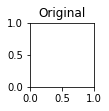

In [13]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지를 그레이 스케일로 읽기
img = cv2.imread('‪classify.PNG', cv2.IMREAD_GRAYSCALE) 
# 경계 값을 130으로 지정  ---①
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)        
# 경계 값을 지정하지 않고 OTSU 알고리즘 선택 ---②
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
print('otsu threshold:', t)                 # Otsu 알고리즘으로 선택된 경계 값 출력

imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(3, 1, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.rcParams["figure.figsize"] = (30,30)
plt.show()